## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9876495	total: 48.5ms	remaining: 48.4s
1:	learn: 0.9658051	total: 49.5ms	remaining: 24.7s
2:	learn: 0.9439531	total: 50.8ms	remaining: 16.9s
3:	learn: 0.9258159	total: 52ms	remaining: 12.9s
4:	learn: 0.9073530	total: 53.2ms	remaining: 10.6s
5:	learn: 0.8889355	total: 54.4ms	remaining: 9.01s
6:	learn: 0.8715164	total: 55.5ms	remaining: 7.87s
7:	learn: 0.8541301	total: 56.5ms	remaining: 7.01s
8:	learn: 0.8375561	total: 57.5ms	remaining: 6.33s
9:	learn: 0.8204599	total: 58.6ms	remaining: 5.8s
10:	learn: 0.8035057	total: 59.6ms	remaining: 5.36s
11:	learn: 0.7877478	total: 60.7ms	remaining: 5s
12:	learn: 0.7718327	total: 61.8ms	remaining: 4.69s
13:	learn: 0.7552817	total: 62.8ms	remaining: 4.43s
14:	learn: 0.7401089	total: 63.8ms	remaining: 4.19s
15:	learn: 0.7254953	total: 64.8ms	remaining: 3.98s
16:	learn: 0.7115608	total: 65.8ms	remaining: 3.8s
17:	learn: 0.6983094	total: 66.7ms	remaining: 3.64s
18:	learn: 0.6851619	total: 67.7ms	remaining: 3.49s


91:	learn: 0.3157168	total: 143ms	remaining: 1.41s
92:	learn: 0.3142786	total: 144ms	remaining: 1.41s
93:	learn: 0.3136648	total: 145ms	remaining: 1.4s
94:	learn: 0.3119681	total: 146ms	remaining: 1.39s
95:	learn: 0.3111091	total: 147ms	remaining: 1.39s
96:	learn: 0.3099252	total: 148ms	remaining: 1.38s
97:	learn: 0.3084713	total: 149ms	remaining: 1.38s
98:	learn: 0.3075620	total: 150ms	remaining: 1.37s
99:	learn: 0.3060833	total: 152ms	remaining: 1.36s
100:	learn: 0.3048286	total: 153ms	remaining: 1.36s
101:	learn: 0.3028687	total: 154ms	remaining: 1.35s
102:	learn: 0.3014997	total: 155ms	remaining: 1.34s
103:	learn: 0.3004375	total: 155ms	remaining: 1.34s
104:	learn: 0.2993969	total: 156ms	remaining: 1.33s
105:	learn: 0.2976526	total: 157ms	remaining: 1.33s
106:	learn: 0.2960122	total: 158ms	remaining: 1.32s
107:	learn: 0.2944760	total: 159ms	remaining: 1.31s
108:	learn: 0.2931721	total: 160ms	remaining: 1.31s
109:	learn: 0.2924901	total: 162ms	remaining: 1.31s
110:	learn: 0.2914539	

227:	learn: 0.2110175	total: 280ms	remaining: 949ms
228:	learn: 0.2104777	total: 282ms	remaining: 948ms
229:	learn: 0.2100751	total: 283ms	remaining: 946ms
230:	learn: 0.2094321	total: 284ms	remaining: 944ms
231:	learn: 0.2089601	total: 285ms	remaining: 942ms
232:	learn: 0.2087175	total: 286ms	remaining: 940ms
233:	learn: 0.2082059	total: 287ms	remaining: 938ms
234:	learn: 0.2078585	total: 288ms	remaining: 936ms
235:	learn: 0.2076550	total: 289ms	remaining: 934ms
236:	learn: 0.2069251	total: 290ms	remaining: 932ms
237:	learn: 0.2061799	total: 292ms	remaining: 934ms
238:	learn: 0.2057403	total: 293ms	remaining: 932ms
239:	learn: 0.2052578	total: 294ms	remaining: 931ms
240:	learn: 0.2045515	total: 295ms	remaining: 929ms
241:	learn: 0.2041733	total: 296ms	remaining: 928ms
242:	learn: 0.2040064	total: 297ms	remaining: 927ms
243:	learn: 0.2031890	total: 299ms	remaining: 925ms
244:	learn: 0.2026866	total: 299ms	remaining: 923ms
245:	learn: 0.2023017	total: 301ms	remaining: 921ms
246:	learn: 

347:	learn: 0.1548094	total: 410ms	remaining: 768ms
348:	learn: 0.1546580	total: 411ms	remaining: 767ms
349:	learn: 0.1542554	total: 412ms	remaining: 766ms
350:	learn: 0.1538944	total: 413ms	remaining: 764ms
351:	learn: 0.1536517	total: 414ms	remaining: 763ms
352:	learn: 0.1532120	total: 415ms	remaining: 761ms
353:	learn: 0.1527848	total: 417ms	remaining: 760ms
354:	learn: 0.1525971	total: 418ms	remaining: 759ms
355:	learn: 0.1522709	total: 419ms	remaining: 757ms
356:	learn: 0.1518854	total: 420ms	remaining: 756ms
357:	learn: 0.1514637	total: 421ms	remaining: 755ms
358:	learn: 0.1511140	total: 422ms	remaining: 754ms
359:	learn: 0.1508883	total: 423ms	remaining: 752ms
360:	learn: 0.1504578	total: 424ms	remaining: 751ms
361:	learn: 0.1501747	total: 425ms	remaining: 749ms
362:	learn: 0.1500463	total: 426ms	remaining: 748ms
363:	learn: 0.1497235	total: 427ms	remaining: 746ms
364:	learn: 0.1494548	total: 428ms	remaining: 745ms
365:	learn: 0.1491629	total: 429ms	remaining: 744ms
366:	learn: 

473:	learn: 0.1226791	total: 548ms	remaining: 608ms
474:	learn: 0.1221924	total: 550ms	remaining: 608ms
475:	learn: 0.1219742	total: 551ms	remaining: 606ms
476:	learn: 0.1218991	total: 552ms	remaining: 605ms
477:	learn: 0.1216065	total: 553ms	remaining: 604ms
478:	learn: 0.1214206	total: 554ms	remaining: 603ms
479:	learn: 0.1210565	total: 555ms	remaining: 601ms
480:	learn: 0.1210156	total: 556ms	remaining: 600ms
481:	learn: 0.1209383	total: 557ms	remaining: 598ms
482:	learn: 0.1205438	total: 558ms	remaining: 597ms
483:	learn: 0.1203800	total: 559ms	remaining: 596ms
484:	learn: 0.1202246	total: 560ms	remaining: 595ms
485:	learn: 0.1199767	total: 561ms	remaining: 593ms
486:	learn: 0.1197449	total: 562ms	remaining: 592ms
487:	learn: 0.1195699	total: 563ms	remaining: 591ms
488:	learn: 0.1195077	total: 564ms	remaining: 589ms
489:	learn: 0.1194705	total: 565ms	remaining: 588ms
490:	learn: 0.1193159	total: 566ms	remaining: 587ms
491:	learn: 0.1190481	total: 567ms	remaining: 585ms
492:	learn: 

602:	learn: 0.0989594	total: 681ms	remaining: 448ms
603:	learn: 0.0987359	total: 682ms	remaining: 447ms
604:	learn: 0.0986168	total: 683ms	remaining: 446ms
605:	learn: 0.0983959	total: 684ms	remaining: 445ms
606:	learn: 0.0981497	total: 685ms	remaining: 444ms
607:	learn: 0.0980728	total: 687ms	remaining: 443ms
608:	learn: 0.0980549	total: 688ms	remaining: 442ms
609:	learn: 0.0979551	total: 689ms	remaining: 440ms
610:	learn: 0.0977919	total: 690ms	remaining: 439ms
611:	learn: 0.0975854	total: 691ms	remaining: 438ms
612:	learn: 0.0975194	total: 692ms	remaining: 437ms
613:	learn: 0.0973496	total: 693ms	remaining: 436ms
614:	learn: 0.0970236	total: 694ms	remaining: 435ms
615:	learn: 0.0969783	total: 695ms	remaining: 433ms
616:	learn: 0.0968891	total: 696ms	remaining: 432ms
617:	learn: 0.0967505	total: 697ms	remaining: 431ms
618:	learn: 0.0964124	total: 698ms	remaining: 430ms
619:	learn: 0.0963987	total: 699ms	remaining: 429ms
620:	learn: 0.0963827	total: 700ms	remaining: 427ms
621:	learn: 

729:	learn: 0.0819201	total: 813ms	remaining: 301ms
730:	learn: 0.0817382	total: 815ms	remaining: 300ms
731:	learn: 0.0816876	total: 816ms	remaining: 299ms
732:	learn: 0.0815646	total: 817ms	remaining: 297ms
733:	learn: 0.0814767	total: 818ms	remaining: 296ms
734:	learn: 0.0813420	total: 819ms	remaining: 295ms
735:	learn: 0.0811393	total: 820ms	remaining: 294ms
736:	learn: 0.0810997	total: 821ms	remaining: 293ms
737:	learn: 0.0809424	total: 822ms	remaining: 292ms
738:	learn: 0.0807338	total: 823ms	remaining: 291ms
739:	learn: 0.0806377	total: 824ms	remaining: 289ms
740:	learn: 0.0805111	total: 825ms	remaining: 288ms
741:	learn: 0.0804194	total: 826ms	remaining: 287ms
742:	learn: 0.0803177	total: 827ms	remaining: 286ms
743:	learn: 0.0802264	total: 828ms	remaining: 285ms
744:	learn: 0.0799858	total: 829ms	remaining: 284ms
745:	learn: 0.0797488	total: 830ms	remaining: 283ms
746:	learn: 0.0796216	total: 831ms	remaining: 281ms
747:	learn: 0.0794308	total: 832ms	remaining: 280ms
748:	learn: 

855:	learn: 0.0676185	total: 942ms	remaining: 159ms
856:	learn: 0.0674365	total: 944ms	remaining: 157ms
857:	learn: 0.0673432	total: 945ms	remaining: 156ms
858:	learn: 0.0672615	total: 946ms	remaining: 155ms
859:	learn: 0.0671806	total: 947ms	remaining: 154ms
860:	learn: 0.0670351	total: 948ms	remaining: 153ms
861:	learn: 0.0669073	total: 949ms	remaining: 152ms
862:	learn: 0.0668809	total: 950ms	remaining: 151ms
863:	learn: 0.0667599	total: 951ms	remaining: 150ms
864:	learn: 0.0666007	total: 952ms	remaining: 149ms
865:	learn: 0.0664648	total: 953ms	remaining: 147ms
866:	learn: 0.0663076	total: 954ms	remaining: 146ms
867:	learn: 0.0661554	total: 955ms	remaining: 145ms
868:	learn: 0.0660597	total: 956ms	remaining: 144ms
869:	learn: 0.0659604	total: 957ms	remaining: 143ms
870:	learn: 0.0658023	total: 958ms	remaining: 142ms
871:	learn: 0.0657112	total: 959ms	remaining: 141ms
872:	learn: 0.0655756	total: 960ms	remaining: 140ms
873:	learn: 0.0655686	total: 961ms	remaining: 139ms
874:	learn: 

986:	learn: 0.0550988	total: 1.08s	remaining: 14.2ms
987:	learn: 0.0550924	total: 1.08s	remaining: 13.1ms
988:	learn: 0.0549785	total: 1.08s	remaining: 12ms
989:	learn: 0.0549524	total: 1.08s	remaining: 10.9ms
990:	learn: 0.0548643	total: 1.08s	remaining: 9.82ms
991:	learn: 0.0547902	total: 1.08s	remaining: 8.73ms
992:	learn: 0.0547529	total: 1.08s	remaining: 7.64ms
993:	learn: 0.0546080	total: 1.08s	remaining: 6.54ms
994:	learn: 0.0544781	total: 1.08s	remaining: 5.45ms
995:	learn: 0.0544717	total: 1.09s	remaining: 4.36ms
996:	learn: 0.0544421	total: 1.09s	remaining: 3.27ms
997:	learn: 0.0544154	total: 1.09s	remaining: 2.18ms
998:	learn: 0.0543053	total: 1.09s	remaining: 1.09ms
999:	learn: 0.0542123	total: 1.09s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

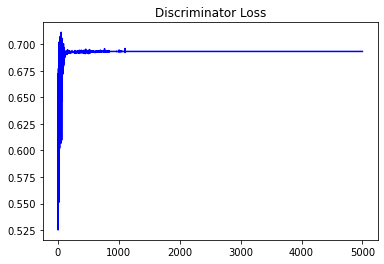

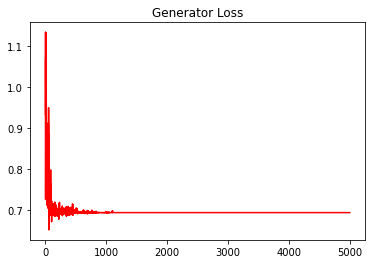

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

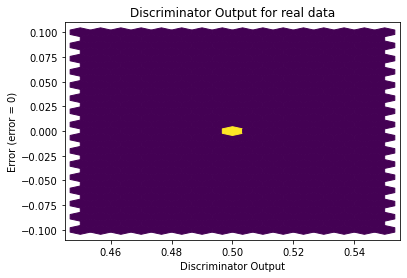

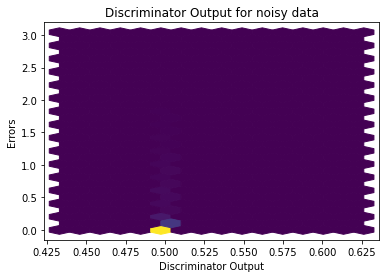

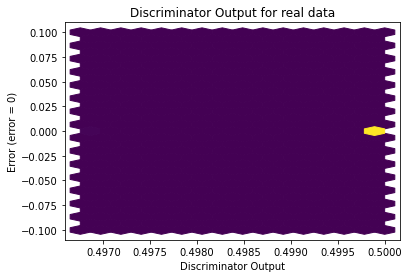

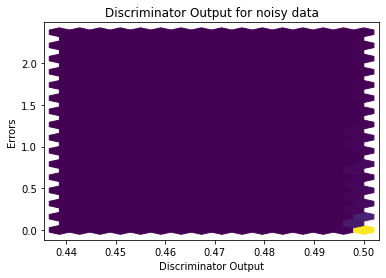

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


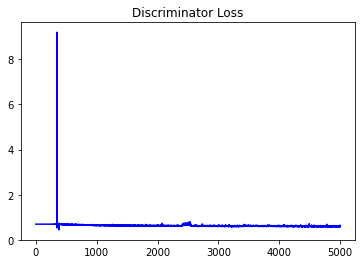

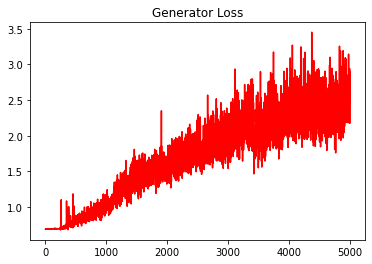

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

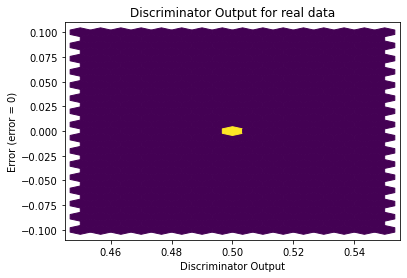

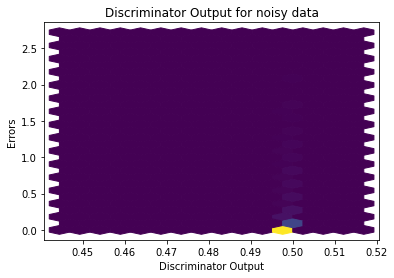

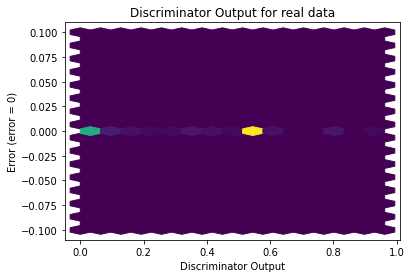

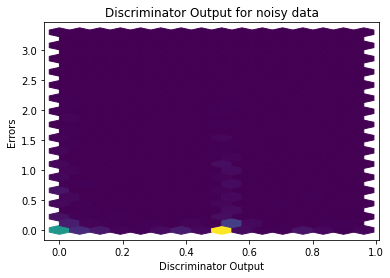

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0101]], device='cuda:0', requires_grad=True)
